# Medical Insurance Dataset

### Problem Statment

# Data Gathering

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [5]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
df['sex'].replace({'male':1, 'female':0}, inplace=True)
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [7]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [8]:
df['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

In [9]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
df['smoker'].replace({'yes':1, 'no':0}, inplace=True)
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [11]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
df= pd.get_dummies(df, columns=['region'])

In [13]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [15]:
df.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [16]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

# Feature Selection

In [17]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

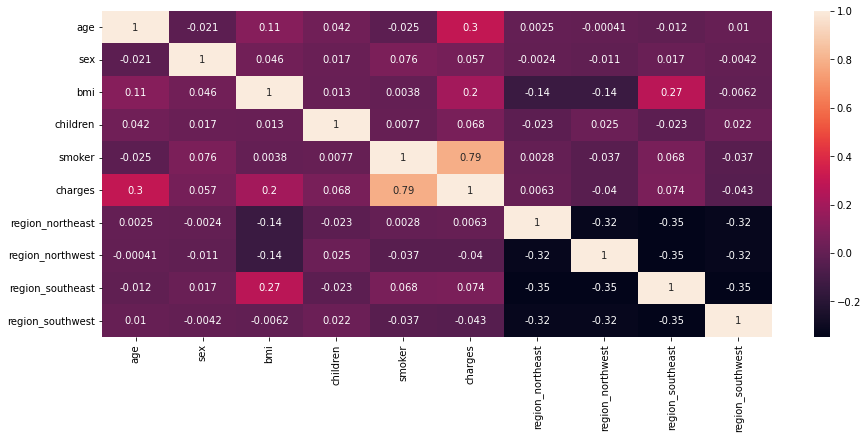

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

# Model Training

In [20]:
x = df.drop('charges',axis=1)
y = df['charges']
x.head(2)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,0,0,0,1
1,18,1,33.77,1,0,0,0,1,0


In [21]:
y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

### Train Test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=12, shuffle = True)

In [24]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
161,18,0,36.850,0,1,0,0,1,0
1032,30,0,27.930,0,0,1,0,0,0
151,48,1,29.700,0,0,0,0,1,0
759,18,1,38.170,0,1,0,0,1,0
362,19,0,21.700,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
278,59,1,31.790,2,0,0,0,1,0
432,42,1,26.900,0,0,0,0,0,1
1283,18,1,30.030,1,0,0,0,1,0
1265,64,1,23.760,0,1,0,0,1,0


In [25]:
y_test

936     32108.66282
728      2217.60120
1307    21472.47880
924      6250.43500
137      2045.68525
           ...     
224     19515.54160
1245     5615.36900
1086    10796.35025
912     14382.70905
534     13831.11520
Name: charges, Length: 268, dtype: float64

## Model 1 --- Linear Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

Training Data,,,

In [29]:
y_pred_train = LR_model.predict(x_train)

In [30]:
MSE = mse(y_train, y_pred_train)
print('MSE :', MSE)
print('***'*20)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)
print('***'*20)

MAE = mae(y_train, y_pred_train)
print('MAE :', MAE)
print('***'*20)

r2 = r2_score(y_train,y_pred_train)
print('r2 score :',r2)

MSE : 35240347.237063214
************************************************************
RMSE : 5936.358078575046
************************************************************
MAE : 4143.046171517505
************************************************************
r2 score : 0.7605423221866592


Testing Data,,,

In [31]:
y_pred_test = LR_model.predict(x_test)

In [32]:
MSE = mse(y_test, y_pred_test)
print('MSE :', MSE)
print('***'*20)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)
print('***'*20)

MAE = mae(y_test, y_pred_test)
print('MAE :', MAE)
print('***'*20)

r2 = r2_score(y_test, y_pred_test)
print('r2 score :',r2)

MSE : 41761889.19064279
************************************************************
RMSE : 6462.343939364632
************************************************************
MAE : 4319.450090036732
************************************************************
r2 score : 0.7100098801471331


In [33]:
Residual_train = y_train - y_pred_train
Residual_train

161     8090.248745
1032    -863.192931
151    -1773.429793
759     7859.747229
362    -9448.659650
           ...     
278    -1043.416856
432    -1208.553999
1283    -509.083163
1265   -8647.929236
1277   -1483.375170
Name: charges, Length: 1070, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

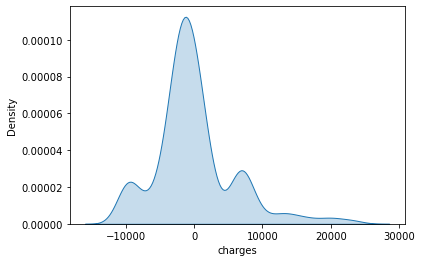

In [34]:
sns.kdeplot(Residual_train, fill=True)

In [35]:
Residual_test = y_test - y_pred_test

<AxesSubplot:xlabel='charges', ylabel='Density'>

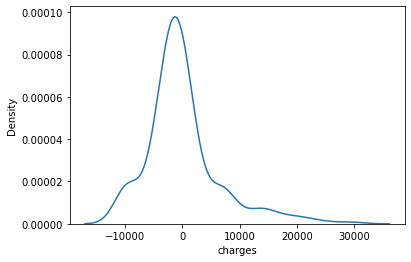

In [36]:
sns.kdeplot(Residual_test)

##### When the Model is not perform well on 'Training' AND not well on 'Testing' Data i.e. 'Overfitting' then we use Ridge & Lasso Regression.

# Model 2 -- Logistic Model

### We Cannot Use Logistic Regression for Given Dataset Because of Prediction is not in the form of ''Categorical''.

# Model 3 --- KNN 'Regression'

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
KNN_model= KNeighborsRegressor()

In [39]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=12)

In [40]:
KNN_model.fit(x_train, y_train)

KNeighborsRegressor()

### Evaluation

In [41]:
y_pred_train_KNN = KNN_model.predict(x_train)

In [42]:
# from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [43]:
MSE= mse(y_train, y_pred_train)     #....KNN train data fitted in 'y_pred_train'
print('MSE :', MSE)
print('***'*20)

RMSE= np.sqrt(MSE)
print('RMSE:', RMSE)
print('***'*20)

MAE = mae(y_train, y_pred_train)
print('MAE :', MAE)
print('***'*20)

r2 = r2_score(y_train, y_pred_train)
print('r2 :', r2)

MSE : 35240347.237063214
************************************************************
RMSE: 5936.358078575046
************************************************************
MAE : 4143.046171517505
************************************************************
r2 : 0.7605423221866592


In [44]:
y_pred_test_KNN = KNN_model.predict(x_test)

In [45]:
MSE= mse(y_test, y_pred_test)     #....KNN test data fitted in 'y_pred_test'
print('MSE :', MSE)
print('***'*20)

RMSE= np.sqrt(MSE)
print('RMSE:', RMSE)
print('***'*20)

MAE = mae(y_test, y_pred_test)
print('MAE :', MAE)
print('***'*20)

r2 = r2_score(y_test, y_pred_test)
print('r2 :', r2)

MSE : 41761889.19064279
************************************************************
RMSE: 6462.343939364632
************************************************************
MAE : 4319.450090036732
************************************************************
r2 : 0.7100098801471331


# Model 4 --- Decision Tree 'Regression'

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
model_DT = DecisionTreeRegressor()

In [48]:
model_DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [51]:
y_pred_train_DT = model_DT.predict(x_train)

In [54]:
MSE = mse(y_train, y_pred_train_DT)
print('MSE :', MSE)
print("***"*20)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)
print("***"*20)

MAE = mae(y_train, y_pred_train_DT)
print('MAE :', MAE)
print("***"*20)

r2 = r2_score(y_train, y_pred_train_DT)
print('r2_score :', r2)


MSE : 244239.55438233944
************************************************************
RMSE : 494.20598375812835
************************************************************
MAE : 29.572515327102803
************************************************************
r2_score : 0.9983403955662205


In [55]:
y_pred_test_DT = model_DT.predict(x_test)

In [56]:
MSE = mse(y_test, y_pred_test_DT)
print('MSE :', MSE)
print("***"*20)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)
print("***"*20)

MAE = mae(y_test, y_pred_test_DT)
print('MAE :', MAE)
print("***"*20)

r2 = r2_score(y_test, y_pred_test_DT)
print('r2_score :', r2)

MSE : 38635063.309613116
************************************************************
RMSE : 6215.711005960067
************************************************************
MAE : 2849.1767986567165
************************************************************
r2_score : 0.7317222267284752


In [59]:
val = x.columns
val

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [93]:
age= 19
sex= 'female'           #{'male':1, 'female':0}
bmi= 12
children= 10
smoker= 'yes'          #{'yes':1, 'no':0}
region= 'southwest'    #use get dummies {region_northeast, region_northwest, region_southeast, region_southwest}

In [102]:
project_data = {'sex': {'male':1, 'female':0},
                'smoker': {'yes':1, 'no':0},
                'columns': list(x.columns)}

project_data['smoker'][smoker]
project_data

{'sex': {'male': 1, 'female': 0},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [105]:
column_names = x.columns
region = 'region_'+'southwest'
region_index = np.where(column_names == region)[0][0]

In [116]:
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [132]:
# df= pd.DataFrame(columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast','region_northwest', 'region_southeast', 'region_southwest'])
# df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest


In [133]:
# cn_names = df.columns
# cn_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [134]:
# reg = 'region_'+'southwest'
# region_ind = np.where(cn_names == reg)[0][0]

In [135]:
# region_ind

8

In [81]:
region_index

8

In [83]:
column_names[8]

'region_southwest'

In [85]:
test_arr = np.zeros(x.shape[1])
test_arr

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [107]:
test_arr.shape[0]

9

In [113]:
# a = np.zeros(shape=(9))
# a

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [94]:
test_arr[0]= age
test_arr[1]= project_data['sex'][sex]
test_arr[2]= bmi
test_arr[3]= children
test_arr[4]= project_data['smoker'][smoker]

test_arr[region_index]= 1 

In [95]:
test_arr

array([19.,  0., 12., 10.,  1.,  0.,  0.,  0.,  1.])

In [100]:
model_DT.predict([test_arr])[0]

16420.49455

In [101]:
import pickle as pkl

with open('model_DT.pkl','wb') as f:
    pkl.dump(model_DT,f)